In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../dataset/train.csv')

In [6]:
# Define function to map passenger classes
def passenger_class_map(passenger_class: int) -> str:
    '''Receive an integer to map the passenger class'''
    try:
        int_Pclass = int(passenger_class)
        if int_Pclass > 3 or int_Pclass < 1:
            raise ValueError
    except TypeError as e:
        print('The passenger class received is not a valid integer')
        raise TypeError
    except ValueError as e:
        print('The passenger class received is not a valid integer within the expected range')
        raise ValueError
    except Exception as e:
        print(f'Exception with the passenger class received: {passenger_class}')
        raise Exception
    else:
        if int_Pclass == 1: p_class = 'First'
        elif int_Pclass == 2: p_class = 'Second'
        elif int_Pclass == 3: p_class = 'Third'
        return p_class

passenger_class_map('2')

'Second'

In [7]:
# Add a derived column to map passenger classes
df['Class'] = df['Pclass'].apply(passenger_class_map)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Second
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,First
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Third
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,First


##### Questions I'd like to answer
* Survival average 

* Decease average

* How is related the passenger class with its survival status

* In which cabin type are the majority if survival passengers

* Which ages were the passengers with greater/lesser survival


### Survival and Decease average
1 = Survived

0 = Deceased

In [67]:
survival = df.groupby('Survived')['Survived'].count() / len(df) * 100
survival

Survived
0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [63]:
# Labels for the Pie chart
labels = ['Survived' if x == 1 else 'Decesed' for x in list(survival.keys())]

([<matplotlib.patches.Wedge at 0x1442e7e7350>,
 [Text(-0.3925747426847413, 1.027562684903461, 'Decesed'),
  Text(0.3925746464773772, -1.0275627216589567, 'Survived')],
 [Text(-0.21413167782804068, 0.5604887372200695, '61.6%'),
  Text(0.21413162535129665, -0.5604887572685218, '38.4%')])

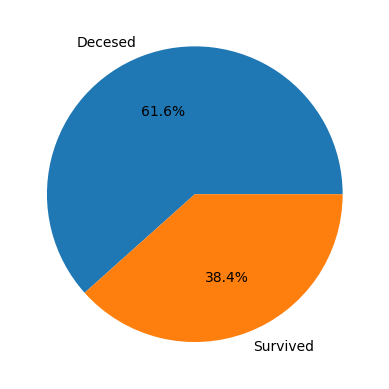

In [66]:
fig, ax = plt.subplots()
ax.pie(survival, labels=labels, autopct='%1.1f%%')

### How is related the passenger class with the survival status

In [9]:
# Pclass is the ticket class with values 1 = 1st, 2 = 2nd, 3 = 3rd
deceases_by_class = df.groupby('Pclass')['Survived'].sum()
deceases_by_class

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

The class with less deceases is the 2nd, however we need to know the number of passengers 
in each class to get the proportion

In [10]:
num_passenger_class = df.groupby('Pclass')['Pclass'].count()
num_passenger_class

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

Get the percentage of people who survived in each class

In [11]:
# Vectorized operations
deceases_by_class * 100 / num_passenger_class
# The first class had the majority of survivals, third class had the most deceases.

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64

### In which cabin type are the majority of deceases

There are a lot of cabins formed by a letter and a number, identify if the cabins are related
to the passenger class.

In [12]:
# Group by cabin type and passenger class
cabin_types = df.groupby([df['Cabin'].map(lambda x: x[0] if pd.notna(x) else x), 'Class'])
# Get the number of survived people
passenger_per_cabin_type = cabin_types['Survived'].count()
survived_per_cabin_type = cabin_types['Survived'].sum()
print(f"# of passengers per cabin type \r\n{passenger_per_cabin_type}")
print(f"\r\n# of survived passengers per cabin type \r\n{survived_per_cabin_type}")
print(f"\r\n# of deceased passengers per cabin type \r\n{passenger_per_cabin_type - survived_per_cabin_type}")

# of passengers per cabin type 
Cabin  Class 
A      First     15
B      First     47
C      First     59
D      First     29
       Second     4
E      First     25
       Second     4
       Third      3
F      Second     8
       Third      5
G      Third      4
T      First      1
Name: Survived, dtype: int64

# of survived passengers per cabin type 
Cabin  Class 
A      First      7
B      First     35
C      First     35
D      First     22
       Second     3
E      First     18
       Second     3
       Third      3
F      Second     7
       Third      1
G      Third      2
T      First      0
Name: Survived, dtype: int64

# of deceased passengers per cabin type 
Cabin  Class 
A      First      8
B      First     12
C      First     24
D      First      7
       Second     1
E      First      7
       Second     1
       Third      0
F      Second     1
       Third      4
G      Third      2
T      First      1
Name: Survived, dtype: int64


##### Which ages were the passengers with greater/lesser survival

Let's categorize the passengers ages into ranges

In [13]:
def categorize_age(age: int) -> str:
    try:
        i_age = int(age)
    except Exception as e:
        return np.nan
    else:
        if i_age in range(0,3):
            category = 'Baby'
        elif i_age in range(3,5):
            category = 'Little kid'
        elif i_age in range(5, 13):
            category = 'Kid'
        elif i_age in range(13, 20):
            category = 'Teenager'
        elif i_age in range(20, 40):
            category = 'Teen adult'
        elif i_age in range(40, 60):
            category = 'Adult'
        elif i_age > 59:
            category = 'Elderly'
        return category

In [14]:
# Create AgeCategory column
df['AgeCategory'] = df['Age'].apply(categorize_age)

In [16]:
# Number of survival passengers by age category
df.groupby('AgeCategory')['Survived'].sum().sort_values(ascending=False)

AgeCategory
Teen adult    150
Adult          54
Teenager       39
Baby           15
Kid            13
Little kid     12
Elderly         7
Name: Survived, dtype: int64